# **Projeto Final: EDIT-DSBA** 
## **Análise de Clusters**
### **Grupo 3: Francisco Ramalhosa, Henrique Zauli, Hernani Luz, Matheus Nascimento**
##### **ramalhosafrancisco@gmail.com; henrique.zauli@gmail.com; hluz00@gmail.com; matheus.lpd.nascimento@gmail.com.**
##### **Módulo 10: Applied Practice** 
##### **Fevereiro 2024, Lisboa**

### **ÍNDICE**

### **1. Definição de Clustering**
### **2. Definição K-means**
### **3. Introdução**
### **4. Importação de Bibliotecas**
### **5. Importação do e Visão Geral do 'DataFrame' ('df')**
### **6. Clustering por Dias**
#### **6.1. Variáveis Numéricas e Categóricas (df)**
#### **6.2. Análise da Distribuição das Variáveis Numéricas (df)** 
#### **6.3. Pré-processamento das Variáveis (df)**  
##### **6.3.1. OneHotEncoder (df)**  
##### **6.3.2. MinMaxScaler() (df)**  
##### **6.3.3. StandardScaler() (df)**  
#### **6.4. Aplicação do K-means (df)**  
##### **6.4.1. MinMaxScaler() (df)**  
###### **6.4.1.1. Método do Cotovelo (Elbow Method) (com normalização minmax - df)**  
###### **6.4.1.2. Clustering K-means por Dias (com normalização minmax)**  
##### **6.4.2. StandardScaler() (df)**  
###### **6.4.2.1. Método do Cotovelo (Elbow Method) (com normalização standard - df)**  
###### **6.4.2.2. Clustering K-means por Dias (com normalização standard)**  
### **7. Clustering por Loja**
#### **7.1. Criação do novo DataFrame ('df_loja') Com Dados Agrupados Por Loja ('loja')**  
#### **7.2. Variáveis Numéricas e Categóricas (df_loja)**  
#### **7.3. Pré-processamento das Variáveis (df_loja)**  
##### **7.3.1. OneHotEncoder (df_loja)**  
##### **7.3.2. MinMaxScaler() (df_loja)**  
##### **7.3.3. StandardScaler() (df_loja)**  
#### **7.4. Aplicação do K-means por Loja** 
##### **7.4.1. MinMaxScaler() (df_loja)**  
###### **7.4.1.1. Método do Cotovelo (Elbow Method) (com normalização minmax - df_loja)**  
###### **7.4.1.2. Clustering K-means por Loja (com normalização minmax)**  
##### **7.4.2. StandardScaler() (df_loja)**  
###### **7.4.2.1. Método do Cotovelo (Elbow Method) (com normalização standard - df_loja)**  
###### **7.4.2.2. Clustering K-means por Loja (com normalização standard)**
### **8. Exportação do DataFrame com a Clusterização**
### **9. Conclusão** 

### **1. Definição de Clustering:**

Clustering é um conjunto de técnicas usadas para particionar dados em grupos (clusters). Os clusters são vagamente definidos como grupos de objetos de dados que são mais semelhantes a outros objetos em seu cluster do que a objetos de dados em outros clusters.

### **2. Definição K-means:**
Para esta análise de Cluster optamos por utilizar o K-means, que é um exemplo de algoritmo de clustering particional. Modelos de clustering particional dividem o conjunto de dados em um número fixo de clusters, onde cada ponto dos dados pertence a um único cluster. O K-means é um dos algoritmos de clustering particional mais comuns e amplamente utilizados.
O tipo de cluster formado pelo algoritmo K-means é conhecido como cluster esférico. Isso significa que o algoritmo assume que os clusters são aproximadamente esféricos e de tamanhos aproximadamente iguais. Calcula a distância entre os pontos de dados e os 'centróides' dos clusters para atribuir cada ponto ao cluster mais próximo.

### **3. Introdução:**
Neste contexto, o objetivo desta clusterização é: 
1. segmentar os dias de atividade das lojas monitorizadas em grupos, considerando o comportamento individual de cada loja a cada dia;
2. quanto ao conjunto de todas as lojas, considerando o comportamento individual de cada loja no conjunto dos dias.

Para isso, serão aplicados dois tipos de clusterização: uma considerando todos os dados de atividade de todas as lojas, e outra realizando o agrupamento separadamente para cada loja.

- A fim de realizar uma análise comparativa robusta, serão empregadas duas técnicas de normalização: o MinMaxScaler e o StandardScaler.

- No final, serão comparados os resultados obtidos com cada técnica de normalização, avaliando a qualidade dos clusters formados e identificando possíveis diferenças na estrutura dos grupos.

- Será ainda aplicado o PCA para reduzir a dimensionalidade dos dados e facilitar a visualização gráfica dos 'clusters' identificados por K-Means no espaço bidimensional.

- A melhor clusterização determinada e escolhida, será exportada para ser utilizada no conjunto de dados do modelo preditivo de vendas (ML).

### **4. Importação de Bibliotecas**

In [1]:
import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
from datetime import timedelta
import re
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

### **5. Importação do e Visão Geral do 'DataFrame'**

In [2]:
df = pd.read_excel('df.xlsx')
df.head(5)

,fk_secao,loja,data,itens,valor,skus_+,skus_-,var_preço_+,var_preço_-,fk_loja,...,contagem_eventos,descricao_feriado,feriado_fixo,tipo,ano,mês,tipo_horario,horas_laborais,percentagem_self_checkouts,percentagem_caixas_tradicionais
0,522,Viseu,2020-01-05,33814,109862.214392,891,1581,0.138385,0.127587,POR010,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 23:00:00,15.0,18.75,81.25
1,522,Viseu,2020-01-09,22926,63819.583059,1655,1200,0.106688,0.149941,POR010,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 23:00:00,15.0,18.75,81.25
2,522,Viseu,2020-01-24,26055,72578.031031,894,1000,0.129946,0.123635,POR010,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 23:00:00,15.0,18.75,81.25
3,522,Viseu,2020-01-27,23556,60853.098660,1066,1121,0.180477,0.198495,POR010,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 23:00:00,15.0,18.75,81.25
4,522,Viseu,2020-01-30,21653,61461.643038,1296,1139,0.162686,0.181002,POR010,...,0,não houve feriado,não houve feriado,não houve feriado,2020,1,08:00:00 - 23:00:00,15.0,18.75,81.25


### **6. Clustering por Dias**

#### **6.1. Variáveis Númericas e Categóricas (df)**

In [3]:
df.dtypes

fk_secao                                    int64
loja                                       object
data                               datetime64[ns]
itens                                       int64
valor                                     float64
skus_+                                      int64
skus_-                                      int64
var_preço_+                               float64
var_preço_-                               float64
fk_loja                                    object
fk_cidade                                   int64
cidade                                     object
fk_regiao                                   int64
regiao                                     object
secao                                      object
produtividade/hora                          int64
n_colaboradores                             int64
skus                                        int64
abertura                           datetime64[ns]
fecho                              datetime64[ns]


In [4]:
# tranformação das variáveis númericas 'horas_laborais', 'percentagem_self_checkouts' e 'percentagem_caixas_tradicionais' em variáveis categóricas

df['horas_laborais'] = df['horas_laborais'].astype(str)
df['percentagem_self_checkouts'] = df['percentagem_self_checkouts'].astype(str)
df['percentagem_caixas_tradicionais'] = df['percentagem_caixas_tradicionais'].astype(str)

In [5]:
df.dtypes

fk_secao                                    int64
loja                                       object
data                               datetime64[ns]
itens                                       int64
valor                                     float64
skus_+                                      int64
skus_-                                      int64
var_preço_+                               float64
var_preço_-                               float64
fk_loja                                    object
fk_cidade                                   int64
cidade                                     object
fk_regiao                                   int64
regiao                                     object
secao                                      object
produtividade/hora                          int64
n_colaboradores                             int64
skus                                        int64
abertura                           datetime64[ns]
fecho                              datetime64[ns]


In [6]:
variaveis_numericas = df[['itens', 'valor','skus_+','skus_-','var_preço_+','var_preço_-','produtividade/hora','n_colaboradores','skus','caixas tradicionais','self checkouts', 'contagem_eventos']]
variaveis_categoricas = df[['loja','cidade','regiao','tipo_horario','horas_laborais','descricao_feriado','feriado_fixo', 'ano', 'mês','percentagem_self_checkouts','percentagem_caixas_tradicionais']]
variaveis_excluidas = df[['fk_secao', 'fk_loja', 'fk_cidade', 'fk_regiao', 'secao', 'abertura', 'fecho', 'tipo', 'data']]

#### **6.2. Análise da Distribuição das Varáveis Númericas (df)**

<Figure size 2000x1200 with 0 Axes>

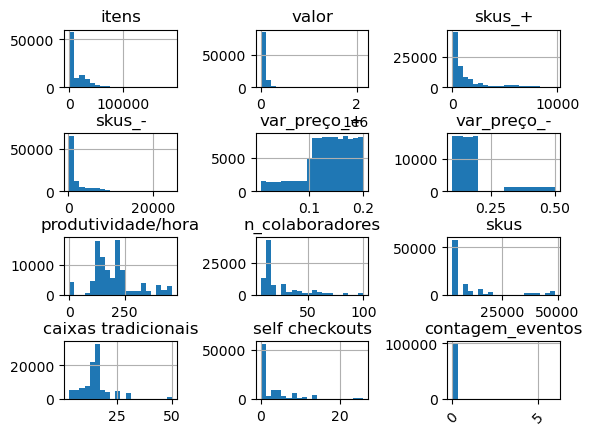

In [7]:
plt.figure(figsize=(20, 12))
variaveis_numericas.hist(bins=20) 
plt.xticks(rotation=45)  
plt.subplots_adjust(wspace=0.7, hspace=0.8)
plt.show()

#### **6.3. Pré-processamento das Variáveis (df)**

##### **6.3.1. OneHotEncoder (df)**

In [8]:
encoder = OneHotEncoder(drop='first') 
variaveis_categoricas_encoded = encoder.fit_transform(variaveis_categoricas)

In [9]:
variaveis_categoricas_encoded_df = pd.DataFrame(
    variaveis_categoricas_encoded.toarray(),
    columns=encoder.get_feature_names_out(variaveis_categoricas.columns)
)

#### **6.3.2. MinMaxScaler() (df)**

A principal função do 'MinMaxScaler' é normalizar os dados, transformando-os para que fiquem dentro de um intervalo específico, geralmente entre 0 e 1. Isso é feito para garantir que diferentes características tenham escalas comparáveis.

In [10]:
scaler_minmax = MinMaxScaler()
variaveis_numericas_normalizadas_minmax = scaler_minmax.fit_transform(variaveis_numericas)

In [11]:
variaveis_numericas_normalizadas_minmax_df = pd.DataFrame(
    variaveis_numericas_normalizadas_minmax,
    columns=variaveis_numericas.columns
)

#### **6.3.3. StandardScaler() (df)**

A principal função do StandardScaler é padronizar os dados para garantir que todas as características tenham uma média de zero e um desvio padrão de um, tornando-os mais apropriados.

In [12]:
scaler_standard = StandardScaler()
variaveis_numericas_normalizadas_standard = scaler_standard.fit_transform(variaveis_numericas)

In [13]:
variaveis_numericas_normalizadas_standard_df = pd.DataFrame(
    variaveis_numericas_normalizadas_standard,
    columns=variaveis_numericas.columns
)

### **6.4. Aplicação do K-means por Dias (df)**

#### **6.4.1. MinMaxScaler() (df)**

In [14]:
features_dias_minmax = pd.concat([variaveis_numericas_normalizadas_minmax_df, variaveis_categoricas_encoded_df], axis=1)

###### **6.4.1.1. Método do Cotovelo (Elbow Method) (com normalização minmax - df)***

Técnica gráfica utilizada em 'clustering' para determinar o número ideal de clusters no conjunto de dados. O objetivo é identificar o ponto no gráfico onde a adição de mais clusters não resulta numa diminuição da variância intra-cluster (dispersão dos pontos dentro de cada cluster). Procuramos o ponto onde a adição de mais clusters não melhora a compactação dos dados. Quanto menor a variância intra-cluster, mais compactos e homogêneos são os clusters. No ponto de inflexão em que a curva do gráfico começa a nivelar indica que adicionar mais clusters não dimiui a variância intra-cluster.  Isso sugere que o número de clusters encontrado até aquele ponto é suficiente para capturar a estrutura dos dados, e adicionar mais clusters não traria muitos benefícios.

C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\francisco\anaconda3\1\L

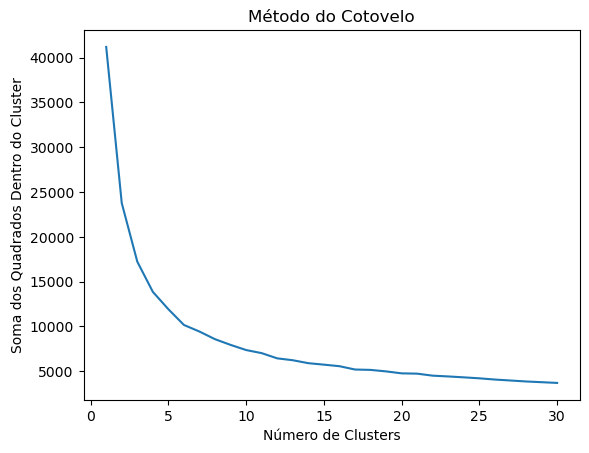

In [15]:
# Criar um dicionário vazio para salvar os valores da soma dos quadrados intra-cluster
wcss = {} 


# Explorar o número de clusters
for i in range(1,31):
    # Executar o modelo k-means
    kmeans = KMeans(n_clusters=i, random_state=0).fit(variaveis_numericas_normalizadas_minmax)
    # Soma dos quadrados das distâncias das amostras aos seus centros de cluster mais próximos.
    wcss[i] = (kmeans.inertia_)



plt.plot(list(wcss.keys()),list(wcss.values()))
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Dentro do Cluster')

plt.show()

Nesta situação, por observação do gráfico resultante da aplicação do Método do Cotovelo, podemos constatar que o ponto de inflexão mais saliente está situados nos 6 clusters.

###### **6.4.1.2. Clustering K-means por Dias (com normalização minmax)**

Após clusterização K-means, a utilização do PCA (Análise de Componentes Principais) com n_components=2, é útil para reduzir a dimensionalidade dos dados originais para apenas duas dimensões. Isso permite visualizar os clusters num gráfico bidimensional, facilitando a interpretação e compreensão dos resultados do K-means.

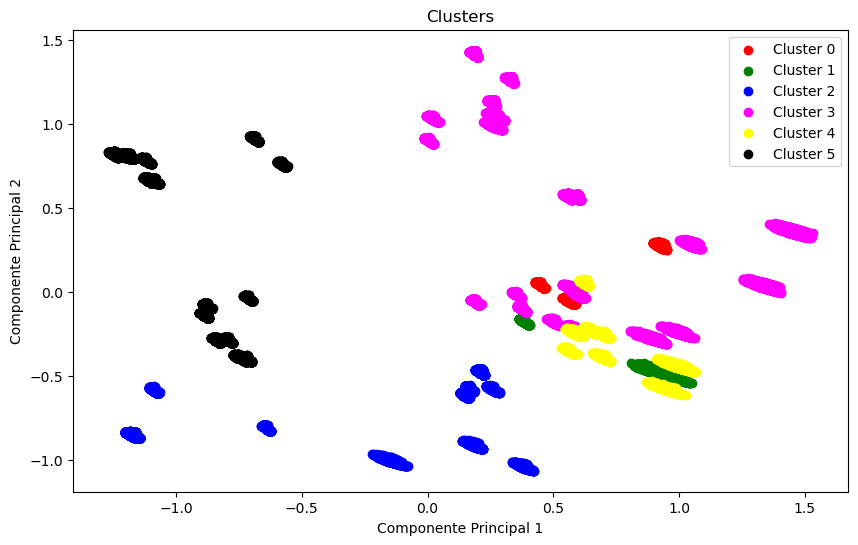

In [16]:
kmeans = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(features_dias_minmax)

labels = kmeans.labels_

df['cluster'] = labels

# PCA está a ser utilizado para reduzir a dimensionalidade dos dados e facilitar a visualização gráfica dos 'clusters' identificados por K-Means no espaço bidimensional.
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_dias_minmax)

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'magenta', 'yellow', 'black', 'cyan', 'brown' ]  
for cluster in range(6):
    plt.scatter(features_pca[labels == cluster, 0], 
                features_pca[labels == cluster, 1], 
                c=colors[cluster], label=f'Cluster {cluster}')

plt.title('Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='upper right')

plt.show()

#### **6.4.2. StandardScaler() (df)**

In [17]:
features_dias_standard = pd.concat([variaveis_numericas_normalizadas_standard_df, variaveis_categoricas_encoded_df], axis=1)

###### **6.4.2.1. Método do Cotovelo (Elbow Method) (com normalização standard - df)**

C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\francisco\anaconda3\1\L

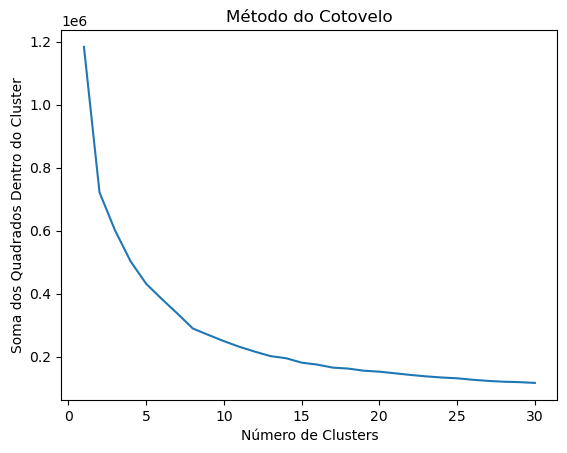

In [18]:
# Criar um dicionário vazio para salvar os valores da soma dos quadrados intra-cluster
wcss = {} 


# Explorar o número de clusters
for i in range(1,31):
    # Executar o modelo k-means
    kmeans = KMeans(n_clusters=i, random_state=0).fit(variaveis_numericas_normalizadas_standard)
    # Soma dos quadrados das distâncias das amostras aos seus centros de cluster mais próximos.
    wcss[i] = (kmeans.inertia_)



plt.plot(list(wcss.keys()),list(wcss.values()))
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Dentro do Cluster')

plt.show()

Nesta situação, por observação do gráfico resultante da aplicação do Método do Cotovelo, podemos constatar que o ponto de inflexão mais saliente está situados nos 8 clusters.

###### **6.4.2.2. Clustering K-means por Dias (com normalização standard)**

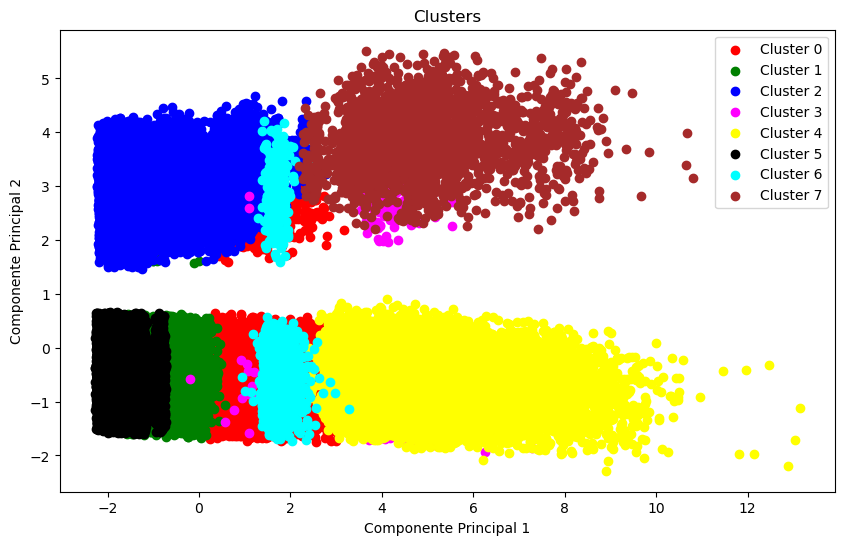

In [19]:
kmeans = KMeans(
    init="random",
    n_clusters=8,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(features_dias_standard)

labels = kmeans.labels_

df['cluster'] = labels

# PCA está a ser utilizado para reduzir a dimensionalidade dos dados e facilitar a visualização gráfica dos 'clusters' identificados por K-Means no espaço bidimensional.
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_dias_standard)

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'magenta', 'yellow', 'black', 'cyan', 'brown' ]  
for cluster in range(8):
    plt.scatter(features_pca[labels == cluster, 0], 
                features_pca[labels == cluster, 1], 
                c=colors[cluster], label=f'Cluster {cluster}')

plt.title('Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='upper right')

plt.show()

### **7. Clustering por Loja**

#### **7.1. Criação do novo DataFrame Com Dados Agrupados Por Loja ('loja')**

In [20]:
# tranformação das variáveis categóricas 'horas_laborais', 'percentagem_self_checkouts' e 'percentagem_caixas_tradicionais' em variáveis númericas.

df['horas_laborais'] = df['horas_laborais'].astype(float)
df['percentagem_self_checkouts'] = df['percentagem_self_checkouts'].astype(float)
df['percentagem_caixas_tradicionais'] = df['percentagem_caixas_tradicionais'].astype(float)

In [21]:
variaveis_first = ['caixas tradicionais', 'self checkouts', 'skus', 'produtividade/hora', 'n_colaboradores', 'cidade', 'regiao','tipo_horario', 'horas_laborais','percentagem_self_checkouts','percentagem_caixas_tradicionais']
variaveis_mean = ['var_preço_+', 'var_preço_-']
variaveis_sum = ['itens', 'valor', 'skus_+', 'skus_-', 'contagem_eventos']
variaveis_excluidas = df[['fk_secao', 'fk_loja', 'fk_cidade', 'fk_regiao', 'secao', 'abertura', 'fecho', 'tipo','feriado_fixo', 'ano', 'mês','data']]

In [22]:
df_loja = df.groupby('loja').agg({
    **{col: 'mean' for col in variaveis_mean},
    **{col: 'sum' for col in variaveis_sum},
    **{col: 'first' for col in variaveis_first}
})

df_loja=df_loja.reset_index()
df_loja.head()

,loja,var_preço_+,var_preço_-,itens,valor,skus_+,skus_-,contagem_eventos,caixas tradicionais,self checkouts,skus,produtividade/hora,n_colaboradores,cidade,regiao,tipo_horario,horas_laborais,percentagem_self_checkouts,percentagem_caixas_tradicionais
0,Alfragide,0.136100,0.184331,85412793,2.729962e+08,6572116,8848669,0,26,8,35052,269,85,Alfragide,Lisboa Central,08:00:00 - 21:00:00,13.0,23.529412,76.470588
1,Almada Fórum,0.136637,0.186936,144010741,4.710767e+08,11120797,15282889,0,26,6,46951,400,100,Almada,Margem Sul,08:30:00 - 23:00:00,14.5,18.750000,81.250000
2,Alverca,0.136517,0.185331,53113935,1.845882e+08,3273881,4466381,45,50,26,17367,335,48,Alverca,Lisboa Norte,08:00:00 - 21:00:00,13.0,34.210526,65.789474
3,Aveiro,0.136509,0.184536,56082049,1.769277e+08,6868502,9554991,0,14,5,36896,227,60,Aveiro,Beira Litoral,08:00:00 - 23:30:00,15.5,26.315789,73.684211
4,Caldas da Rainha,0.136750,0.186530,7953319,1.740366e+07,522365,708299,0,4,4,2760,136,7,Caldas da Rainha,Lisboa Norte,07:00:00 - 20:00:00,13.0,50.000000,50.000000


#### **7.2. Variáveis Númericas e Categóricas (df_loja)**

In [23]:
# nova tranformação das variáveis númericas 'horas_laborais', 'percentagem_self_checkouts' e 'percentagem_caixas_tradicionais' em variáveis categóricas

df_loja['horas_laborais'] = df_loja['horas_laborais'].astype(str)
df_loja['percentagem_self_checkouts'] = df_loja['percentagem_self_checkouts'].astype(str)
df_loja['percentagem_caixas_tradicionais'] = df_loja['percentagem_caixas_tradicionais'].astype(str)

In [24]:
variaveis_numericas_loja = df_loja[['itens', 'valor','skus_+','skus_-','var_preço_+','var_preço_-','produtividade/hora','n_colaboradores','skus','caixas tradicionais','self checkouts', 'contagem_eventos']]
variaveis_categoricas_loja = df_loja[['loja','cidade','regiao','tipo_horario','horas_laborais','percentagem_self_checkouts','percentagem_caixas_tradicionais']]


#### **7.3. Pré-processamento das Variáveis (df_loja)**

##### **7.3.1. OneHotEncoder (df_loja)**

In [25]:
encoder = OneHotEncoder(drop='first') 
variaveis_categoricas_loja_encoded = encoder.fit_transform(variaveis_categoricas_loja)

In [26]:
variaveis_categoricas_loja_encoded_df = pd.DataFrame(
    variaveis_categoricas_loja_encoded.toarray(),
    columns=encoder.get_feature_names_out(variaveis_categoricas_loja.columns)
)

##### **7.3.2. MinMaxScaler() (df_loja)**

In [27]:
scaler_loja_minmax = MinMaxScaler()
variaveis_numericas_loja_normalizadas_minmax = scaler_minmax.fit_transform(variaveis_numericas_loja)

In [28]:
variaveis_numericas_loja_normalizadas_minmax_df = pd.DataFrame(
    variaveis_numericas_loja_normalizadas_minmax,
    columns=variaveis_numericas_loja.columns
)

##### **7.3.3. StandardScaler() (df_loja)**

In [29]:
scaler_loja_standard = StandardScaler()
variaveis_numericas_loja_normalizadas_standard = scaler_standard.fit_transform(variaveis_numericas_loja)

In [30]:
variaveis_numericas_loja_normalizadas_standard_df = pd.DataFrame(
    variaveis_numericas_loja_normalizadas_standard,
    columns=variaveis_numericas_loja.columns
)

#### **7.4. Aplicação do K-means por Loja**

##### **7.4.1. MinMaxScaler() (df_loja)**

In [31]:
features_loja_minmax = pd.concat([variaveis_numericas_loja_normalizadas_minmax_df, variaveis_categoricas_loja_encoded_df], axis=1)

In [32]:
features_loja_minmax.head()

,itens,valor,skus_+,skus_-,var_preço_+,var_preço_-,produtividade/hora,n_colaboradores,skus,caixas tradicionais,...,percentagem_caixas_tradicionais_73.33333333333333,percentagem_caixas_tradicionais_73.68421052631578,percentagem_caixas_tradicionais_76.0,percentagem_caixas_tradicionais_76.47058823529412,percentagem_caixas_tradicionais_80.0,percentagem_caixas_tradicionais_81.25,percentagem_caixas_tradicionais_82.35294117647058,percentagem_caixas_tradicionais_83.33333333333334,percentagem_caixas_tradicionais_85.0,percentagem_caixas_tradicionais_85.71428571428571
0,0.590007,0.577726,0.583736,0.571628,0.400375,0.299946,0.583514,0.838710,0.702768,0.489362,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,1.000000,1.000000,1.000000,0.550713,0.883710,0.867679,1.000000,0.959838,0.489362,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.364021,0.389256,0.281905,0.279868,0.517107,0.523870,0.726681,0.440860,0.320695,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.384788,0.372925,0.610859,0.618653,0.514693,0.345795,0.492408,0.569892,0.742606,0.234043,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.048045,0.032847,0.030105,0.029665,0.582251,0.792665,0.295011,0.000000,0.005120,0.021277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
features_loja_minmax.shape

(70, 202)

###### **7.4.1.1. Método do Cotovelo (Elbow Method) (com normalização minmax - df_loja)**

C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

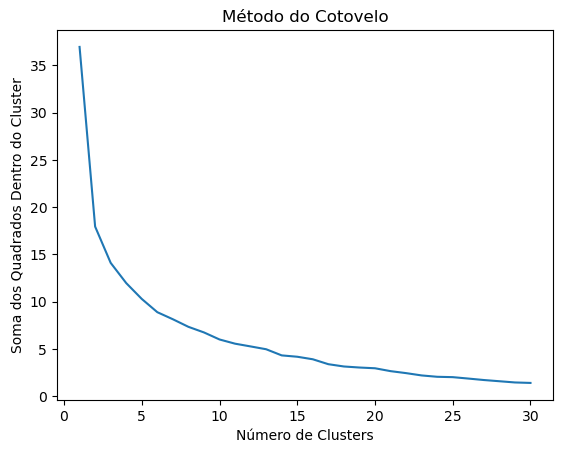

In [34]:
# Criar um dicionário vazio para salvar os valores da soma dos quadrados intra-cluster
wcss = {} 


# Explorar o número de clusters
for i in range(1,31):
    # Executar o modelo k-means
    kmeans = KMeans(n_clusters=i, random_state=0).fit(variaveis_numericas_loja_normalizadas_minmax)
    # Soma dos quadrados das distâncias das amostras aos seus centros de cluster mais próximos.
    wcss[i] = (kmeans.inertia_)



plt.plot(list(wcss.keys()),list(wcss.values()))
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Dentro do Cluster')

plt.show()

Nesta situação, por observação do gráfico resultante da aplicação do Método do Cotovelo, podemos constatar que o ponto de inflexão mais saliente está situados nos 6 clusters.

##### **7.4.1.2. Clustering K-means por Loja (com normalização minmax)**

In [35]:
df_cluster = df_loja.copy()

C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


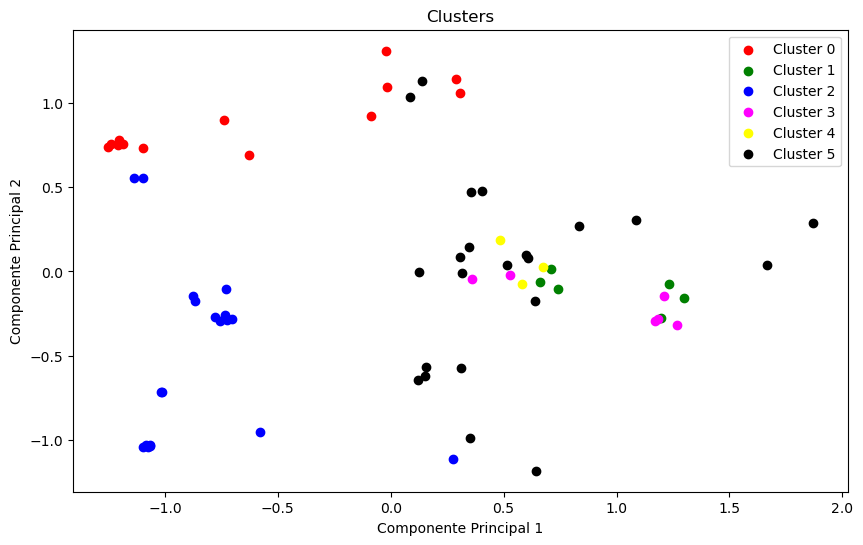

In [36]:
kmeans = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(features_loja_minmax)

labels = kmeans.labels_

df_cluster['cluster'] = labels

# PCA está a ser utilizado para reduzir a dimensionalidade dos dados e facilitar a visualização gráfica dos 'clusters' identificados por K-Means no espaço bidimensional.
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_loja_minmax)

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'magenta', 'yellow', 'black', 'cyan', 'brown' ]  
for cluster in range(6):
    plt.scatter(features_pca[labels == cluster, 0], 
                features_pca[labels == cluster, 1], 
                c=colors[cluster], label=f'Cluster {cluster}')

plt.title('Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='upper right')

plt.show()

#### **7.4.2. StandardScaler() (df_loja)**

In [37]:
features_loja_standard = pd.concat([variaveis_numericas_loja_normalizadas_standard_df, variaveis_categoricas_loja_encoded_df], axis=1)

##### **7.4.2.1. Método do Cotovelo (Elbow Method) (com normalização standard - df_loja)**

C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

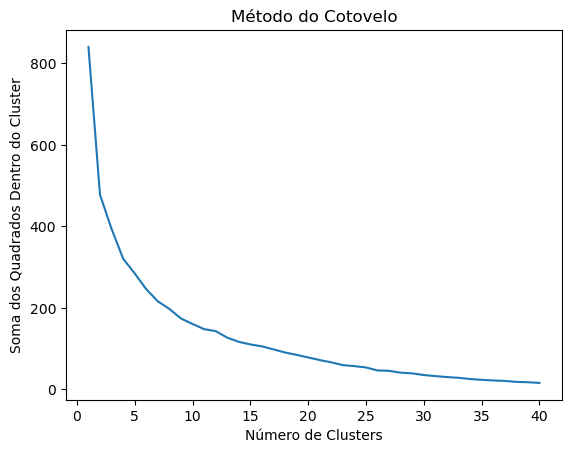

In [38]:
# Criar um dicionário vazio para salvar os valores da soma dos quadrados intra-cluster
wcss = {} 


# Explorar o número de clusters
for i in range(1,41):
    # Executar o modelo k-means
    kmeans = KMeans(n_clusters=i, random_state=0).fit(variaveis_numericas_loja_normalizadas_standard )
    # Soma dos quadrados das distâncias das amostras aos seus centros de cluster mais próximos.
    wcss[i] = (kmeans.inertia_)



plt.plot(list(wcss.keys()),list(wcss.values()))
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Dentro do Cluster')

plt.show()

Nesta situação, por observação do gráfico resultante da aplicação do Método do Cotovelo, podemos constatar que o ponto de inflexão mais saliente está situados nos 8 clusters.

##### **7.4.2.2. Clustering K-means por Loja (com normalização standard)**

C:\Users\francisco\anaconda3\1\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


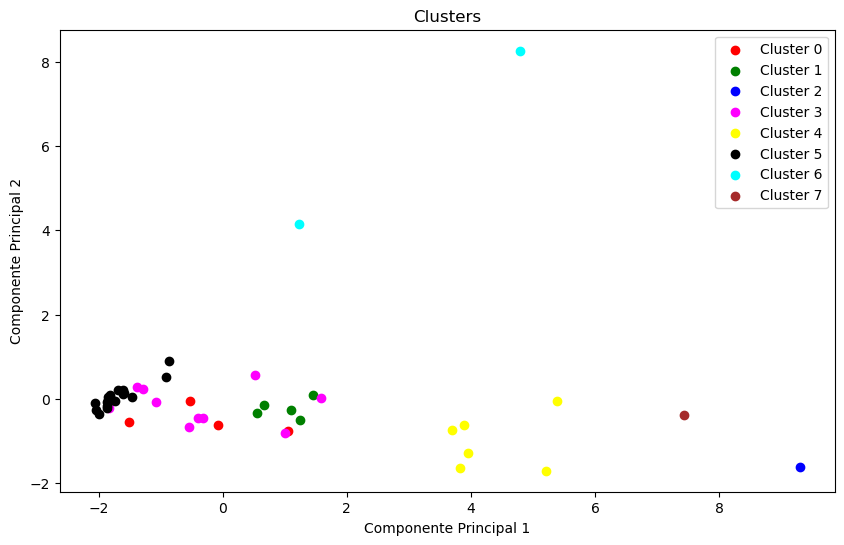

In [39]:
kmeans = KMeans(
    init="random",
    n_clusters=12,
    n_init=8,
    max_iter=300,
    random_state=42
)
kmeans.fit(features_loja_standard)

labels = kmeans.labels_

df_loja['cluster'] = labels

# PCA está a ser utilizado para reduzir a dimensionalidade dos dados e facilitar a visualização gráfica dos 'clusters' identificados por K-Means no espaço bidimensional.
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_loja_standard)

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'magenta', 'yellow', 'black', 'cyan', 'brown', 
          'orange', 'purple', 'pink', 'lightblue', 'lime', 'gray', 'darkred']  
for cluster in range(8):
    plt.scatter(features_pca[labels == cluster, 0], 
                features_pca[labels == cluster, 1], 
                c=colors[cluster], label=f'Cluster {cluster}')

plt.title('Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='upper right')

plt.show()

### **8. Exportação do DataFrame com a Clusterização Escolhida**

Clusterização K-means por Loja com normalização 'minmax', foi a escolhida para esta análise Cluster. E por isso o DataFrame exportado terá a classificação Cluster baseada neste modelo em concreto.

In [2]:
df_cluster = df_cluster[['loja', 'cluster']]
df_cluster.info()

NameError: name 'df_cluster' is not defined

In [1]:
#df_cluster.to_csv('df_cluster', index=False)

### **9. Conclusão**

Clusterização K-means por Loja com normalização 'minmax', foi a escolhida para esta análise Cluster.  
No contexto deste estudo e numa prespetiva de modelação preditiva do valor de faturação por loja (que foi realizada em outro notebook), é mais interessante para a análise do problema fazer agrupamentos tendo em consideração as caracteristicas comuns das lojas em estudo, do que fazer agrupamentos tendo por base as caracteristicas de cada dia de vendas.
Entre a clusterização k-means com normalização 'minmax' e 'stadardscaler' foi escolhida a normalização 'minmax' por apresentar um ponto de inflexão mais acentuado no gráfico do 'Método do Cotovelo'. O ponto de inflexão no gráfico do 'Método do Cotovelo' é mais acentuado com a normalização 'minmax', isso sugere que a normalização 'minmax' pode ser mais apropriada para este conjunto de dados específico.  Neste caso em concreto, a normalização 'minmax' está a proporcionar uma separação mais clara e significativa dos clusters em comparação com a normalização 'standardscaler'. Ou seja, as características das lojas estão melhor representadas e distinguidas após a normalização 'minmax', tornando-a uma escolha mais apropriada para esta análise de clusters.